In [1]:
# Import modules

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix


In [2]:
# Read in the data and divide it into away and home team dataframes

data = pd.read_csv('model_data.csv')
data['WINNER_cat'] = data['WINNER'].astype('category')

away = data.iloc[::2]
home = data.iloc[1::2]

Text(87, 0.465, 'n = 86')

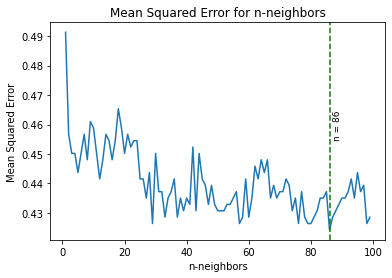

In [3]:
# KNN Regression for away dataset

# Create the X and y variables and the corresponding train and test sets

y = away['WINNER'].values
X = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 805, test_size = .3)

# Find the best value for the hyperparameter for amount of neighbors through 5-fold cross validation

kf = KFold(5)

mse_cv = []
mse_cv_mean = []

for p in np.arange(1, 100):
    for itrain, itest in kf.split(X):
        X_train,X_test,y_train,y_test = X[itrain], X[itest], y[itrain], y[itest]
        knn = KNeighborsClassifier(n_neighbors = p)
        knn.fit(X_train, y_train)
        val = mean_squared_error(y_test, knn.predict(X_test))
        mse_cv_mean.append(val)
    mse_cv.append(np.mean(val))

hyper = mse_cv.index(min(mse_cv)) + 1
textstr = "n = " + str(hyper)
#props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.plot(np.arange(1, 100), mse_cv)
plt.axvline(x = hyper, linestyle = 'dashed', color = 'green')
plt.xlabel("n-neighbors")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for n-neighbors")
plt.text(hyper + 1, 0.465, textstr, fontsize = 9, verticalalignment = 'top', rotation = 90)


In [4]:
def knn_model_preds(X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors = hyper)
  fit_knn = knn.fit(X_train, y_train)
  
  train_preds = fit_knn.predict(X_train)
  train_prob = fit_knn.predict_proba(X_train)[:,1]
  test_preds = fit_knn.predict(X_test)
  test_prob = fit_knn.predict_proba(X_test)[:,1]
  return train_preds, train_prob, test_preds, test_prob


In [5]:
away_ratio_train, away_ratio_train_p, away_ratio_test, away_ratio_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, away_ratio_train))
print(metrics.classification_report(y_test, away_ratio_test))

              precision    recall  f1-score   support

           0       0.61      0.94      0.74      1064
           1       0.68      0.19      0.30       784

    accuracy                           0.62      1848
   macro avg       0.65      0.56      0.52      1848
weighted avg       0.64      0.62      0.55      1848

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       252
           1       0.62      0.17      0.26       210

    accuracy                           0.58       462
   macro avg       0.60      0.54      0.48       462
weighted avg       0.59      0.58      0.50       462



In [6]:
fpr_away_ratio, tpr_away_ratio, thresh = roc_curve(y_test, away_ratio_test)

In [7]:
X_diff = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify = y, random_state = 805, test_size = .3)

In [8]:
away_diff_train, away_diff_train_p, away_diff_test, away_diff_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, away_diff_train))
print(metrics.classification_report(y_test, away_diff_test))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72       921
           1       0.62      0.26      0.37       696

    accuracy                           0.61      1617
   macro avg       0.61      0.57      0.54      1617
weighted avg       0.61      0.61      0.57      1617

              precision    recall  f1-score   support

           0       0.61      0.87      0.72       395
           1       0.60      0.26      0.36       298

    accuracy                           0.61       693
   macro avg       0.60      0.56      0.54       693
weighted avg       0.60      0.61      0.56       693



In [9]:
fpr_away_diff, tpr_away_diff, thresh = roc_curve(y_test, away_diff_test_p)

In [10]:
y = home['WINNER'].values
X = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=805, test_size=.3)

In [11]:
home_ratio_train, home_ratio_train_p, home_ratio_test, home_ratio_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, home_ratio_train))
print(metrics.classification_report(y_test, home_ratio_test))

              precision    recall  f1-score   support

           0       0.57      0.26      0.36       696
           1       0.60      0.85      0.71       921

    accuracy                           0.60      1617
   macro avg       0.59      0.56      0.53      1617
weighted avg       0.59      0.60      0.56      1617

              precision    recall  f1-score   support

           0       0.56      0.26      0.35       298
           1       0.60      0.85      0.70       395

    accuracy                           0.59       693
   macro avg       0.58      0.55      0.53       693
weighted avg       0.58      0.59      0.55       693



In [16]:
fpr_home_ratio, tpr_home_ratio, thresh = roc_curve(y_test, home_ratio_test_p)

In [12]:
X_diff = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values
X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify = y, random_state = 805, test_size = .3)

In [13]:
home_diff_train, home_diff_train_p, home_diff_test, home_diff_test_p = knn_model_preds(X_train, X_test, y_train, y_test)
print(metrics.classification_report(y_train, home_diff_train))
print(metrics.classification_report(y_test, home_diff_test))

              precision    recall  f1-score   support

           0       0.60      0.31      0.41       696
           1       0.62      0.85      0.71       921

    accuracy                           0.61      1617
   macro avg       0.61      0.58      0.56      1617
weighted avg       0.61      0.61      0.58      1617

              precision    recall  f1-score   support

           0       0.61      0.37      0.46       298
           1       0.63      0.83      0.72       395

    accuracy                           0.63       693
   macro avg       0.62      0.60      0.59       693
weighted avg       0.62      0.63      0.61       693



In [14]:
fpr_home_diff, tpr_home_diff, thresh = roc_curve(y_test, home_diff_test_p)

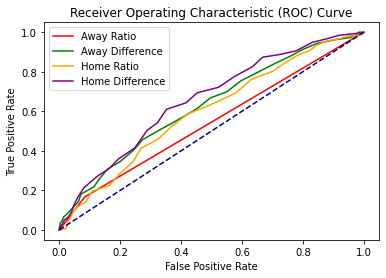

In [17]:
plt.plot(fpr_away_ratio, tpr_away_ratio, color='red',label='Away Ratio')
plt.plot(fpr_away_diff, tpr_away_diff, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio, tpr_home_ratio, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff, tpr_home_diff, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)